# Digital Ads Data

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000

CPC = Total Cost (spend) / Number of Clicks

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from factor_analyzer import FactorAnalyzer 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r'F:\Personal\PGP\Data Mining\Project\Clustering+Clean+Ads_Data.xlsx')

In [3]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.0,0.35,0.0,0.0000,0.0,NaN
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.0,0.35,0.0,0.0000,0.0,NaN
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.0,0.35,0.0,0.0000,0.0,NaN
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.0,0.35,0.0,0.0000,0.0,NaN


In [4]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
25852,2020-10-1-5,Format5,720,300,216000,Inter222,Video,Desktop,Video,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25853,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
25854,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN
25855,2020-9-30-4,Format7,300,600,180000,Inter228,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25856,2020-10-17-3,Format5,720,300,216000,Inter225,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [6]:
df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,25857.000000,25857.000000,25857.000000,2.585700e+04,2.585700e+04,2.585700e+04,25857.000000,25857.000000,25857.000000,25857.000000,19392.000000,19392.000000,18330.000000
mean,390.431218,332.182774,99683.276482,2.169621e+06,1.155322e+06,1.107525e+06,9525.881386,2414.473115,0.336729,1716.548955,0.069627,7.252900,0.351061
std,230.696051,194.260924,62640.685612,4.542680e+06,2.407244e+06,2.326648e+06,16721.686071,3932.835240,0.030540,2993.025498,0.074970,6.538314,0.343334
min,120.000000,70.000000,33600.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,9.133000e+03,5.451000e+03,2.558000e+03,305.000000,36.030000,0.350000,23.420000,0.002400,1.630000,0.090000
50%,300.000000,300.000000,75000.000000,3.309680e+05,1.894490e+05,1.621620e+05,3457.000000,1173.660000,0.350000,762.880000,0.007700,3.035000,0.160000
75%,720.000000,600.000000,84000.000000,2.208484e+06,1.008171e+06,9.496930e+05,10681.000000,2692.280000,0.350000,1749.982000,0.128300,12.220000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


In [7]:
df.shape

(25857, 19)

In [8]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df1 = df.copy()

In [11]:
CPM = (df1['Spend']/df1['Impressions']*1000)
df1['CPM'] = CPM

In [12]:
CPC = df1['Spend']/df1['Clicks']
df1['CPC'] = CPC

In [13]:
CTR = (df1['Clicks'])/(df1['Impressions']*100)
df1['CTR'] = CTR

In [14]:
df1['CPC'] = df1['CPC'].fillna(0)
df1['CPM'] = df1['CPM'].fillna(0)
df1['CTR'] = df1['CTR'].fillna(0)

In [15]:
df1.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [16]:
df1.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.000031,0.0,0.0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.0,0.35,0.0,0.000000,0.0,0.0
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.0,0.35,0.0,0.000000,0.0,0.0
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.0,0.35,0.0,0.000000,0.0,0.0
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.0,0.35,0.0,0.000000,0.0,0.0


In [17]:
df1 = df1.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'], axis = 1)
df1

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.000031,0.0,0.00
1,300,250,75000,1979,384,380,0,0.00,0.35,0.0000,0.000000,0.0,0.00
2,336,250,84000,1566,298,297,0,0.00,0.35,0.0000,0.000000,0.0,0.00
3,300,250,75000,643,103,102,0,0.00,0.35,0.0000,0.000000,0.0,0.00
4,300,250,75000,1550,347,345,0,0.00,0.35,0.0000,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25852,720,300,216000,1,1,1,0,0.01,0.35,0.0065,0.000000,10.0,inf
25853,120,600,72000,7,1,1,1,0.07,0.35,0.0455,0.010000,70.0,0.07
25854,720,300,216000,2,2,2,1,0.09,0.35,0.0585,0.005000,45.0,0.09
25855,300,600,180000,1,1,1,0,0.01,0.35,0.0065,0.000000,10.0,inf


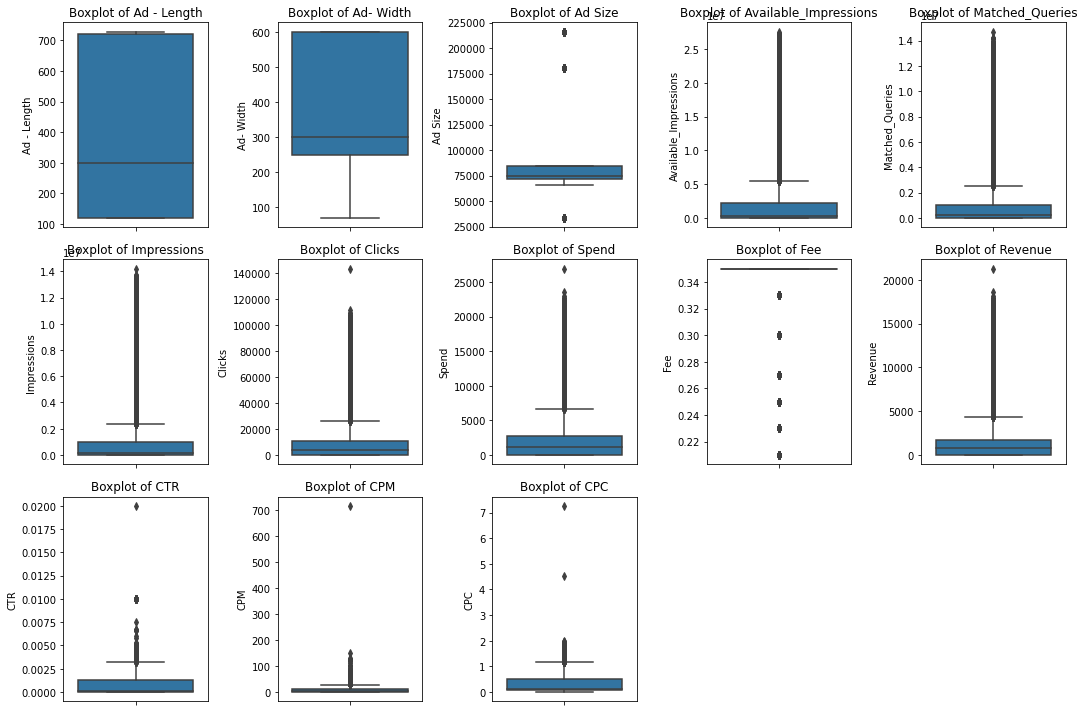

In [18]:
plt.figure(figsize = (15,10))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data = df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [19]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [20]:
for i in feature_list:
    LL, UL = remove_outlier(df1[i])
    df1[i] = np.where(df1[i] > UL, UL, df1[i])
    df1[i] = np.where(df1[i] < LL, LL, df1[i])

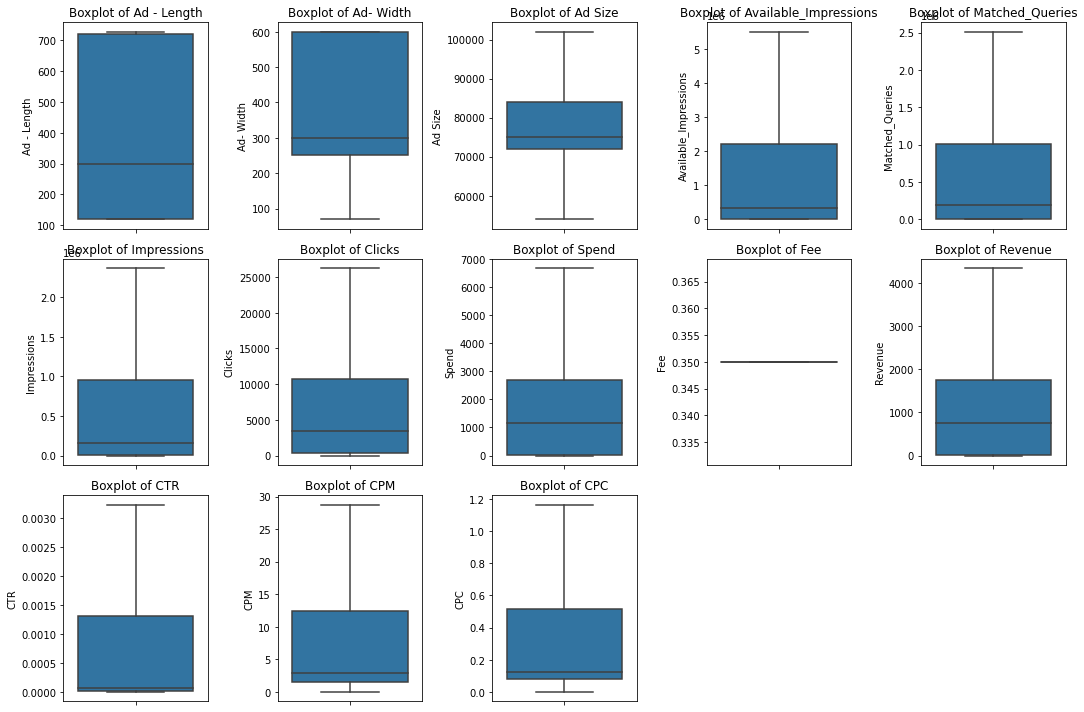

In [21]:
plt.figure(figsize = (15,10))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data = df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [22]:
from scipy.stats import zscore
df1_scaled=df1.apply(zscore)
df1_scaled

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.392000,-0.423062,-0.161806,-0.714953,-0.744816,-0.735050,-0.821889,-0.844382,NaN,-0.841307,-0.858797,-1.061341,-0.944841
1,-0.392000,-0.423062,-0.161806,-0.714862,-0.744749,-0.734983,-0.822006,-0.844382,NaN,-0.841307,-0.896698,-1.061341,-0.944841
2,-0.235948,-0.423062,0.424415,-0.715079,-0.744846,-0.735081,-0.822006,-0.844382,NaN,-0.841307,-0.896698,-1.061341,-0.944841
3,-0.392000,-0.423062,-0.161806,-0.715566,-0.745066,-0.735313,-0.822006,-0.844382,NaN,-0.841307,-0.896698,-1.061341,-0.944841
4,-0.392000,-0.423062,-0.161806,-0.715088,-0.744791,-0.735024,-0.822006,-0.844382,NaN,-0.841307,-0.896698,-1.061341,-0.944841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25852,1.428612,-0.165671,1.596856,-0.715905,-0.745182,-0.735432,-0.822006,-0.844377,NaN,-0.841303,-0.896698,0.381498,2.696463
25853,-1.172263,1.378674,-0.357213,-0.715901,-0.745182,-0.735432,-0.821889,-0.844350,NaN,-0.841276,3.057812,3.088730,-0.725831
25854,1.428612,-0.165671,1.596856,-0.715904,-0.745180,-0.735431,-0.821889,-0.844341,NaN,-0.841267,3.057812,3.088730,-0.663256
25855,-0.392000,1.378674,1.596856,-0.715905,-0.745182,-0.735432,-0.822006,-0.844377,NaN,-0.841303,-0.896698,0.381498,2.696463


In [23]:
df1_scaled_ = df1_scaled.drop(['Fee'], axis = 1)

In [24]:
df1_scaled_

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC
0,-0.392000,-0.423062,-0.161806,-0.714953,-0.744816,-0.735050,-0.821889,-0.844382,-0.841307,-0.858797,-1.061341,-0.944841
1,-0.392000,-0.423062,-0.161806,-0.714862,-0.744749,-0.734983,-0.822006,-0.844382,-0.841307,-0.896698,-1.061341,-0.944841
2,-0.235948,-0.423062,0.424415,-0.715079,-0.744846,-0.735081,-0.822006,-0.844382,-0.841307,-0.896698,-1.061341,-0.944841
3,-0.392000,-0.423062,-0.161806,-0.715566,-0.745066,-0.735313,-0.822006,-0.844382,-0.841307,-0.896698,-1.061341,-0.944841
4,-0.392000,-0.423062,-0.161806,-0.715088,-0.744791,-0.735024,-0.822006,-0.844382,-0.841307,-0.896698,-1.061341,-0.944841
...,...,...,...,...,...,...,...,...,...,...,...,...
25852,1.428612,-0.165671,1.596856,-0.715905,-0.745182,-0.735432,-0.822006,-0.844377,-0.841303,-0.896698,0.381498,2.696463
25853,-1.172263,1.378674,-0.357213,-0.715901,-0.745182,-0.735432,-0.821889,-0.844350,-0.841276,3.057812,3.088730,-0.725831
25854,1.428612,-0.165671,1.596856,-0.715904,-0.745180,-0.735431,-0.821889,-0.844341,-0.841267,3.057812,3.088730,-0.663256
25855,-0.392000,1.378674,1.596856,-0.715905,-0.745182,-0.735432,-0.822006,-0.844377,-0.841303,-0.896698,0.381498,2.696463


In [25]:
wardlink = linkage(df1_scaled_, method = 'ward', metric='euclidean')

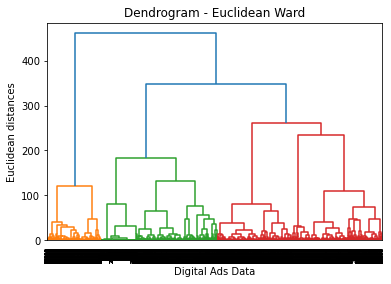

In [26]:
dend = dendrogram(wardlink)
plt.title('Dendrogram - Euclidean Ward') 
plt.xlabel('Digital Ads Data')
plt.ylabel('Euclidean distances') 
plt.show()

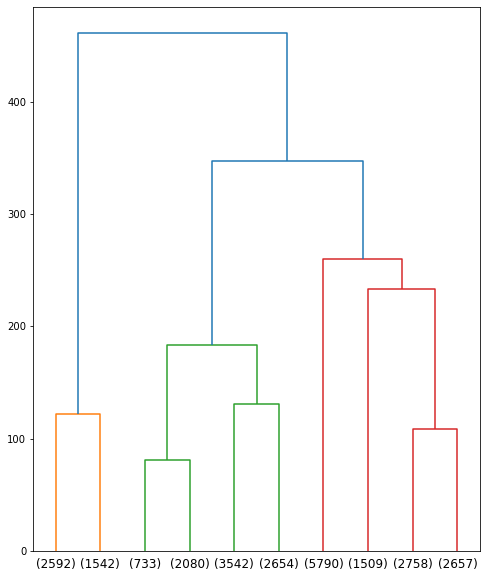

In [27]:
plt.figure(figsize = (8,10))
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [28]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([2, 2, 2, ..., 3, 2, 2], dtype=int32)

In [29]:
df['cluster_hierarchical'] = clusters

In [30]:
wss =[] 

In [31]:
for i in range(1,12):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df1_scaled_)
    wss.append(KM.inertia_)

In [32]:
wss

[310283.9999999993,
 190839.92450974902,
 142302.23286147995,
 106411.30026695017,
 77802.80647787919,
 62177.7140434582,
 54333.62057646607,
 47151.955925131435,
 41796.09121193508,
 38235.51201197767,
 34774.712143560086]

In [35]:
a=[1,2,3,4,5,6,7,8,9,10,11]

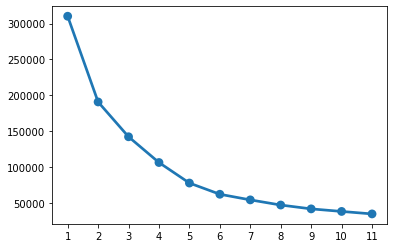

In [36]:
sns.pointplot(a, wss);

In [37]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df1_scaled_)
labels = k_means.labels_

In [38]:
silhouette_score(df1_scaled_,labels,random_state=1)

0.47702564772088174

In [39]:
for n_cluster in range(2, 12):

    kmeans = KMeans(n_clusters=n_cluster).fit(df1_scaled_)

    label = kmeans.labels_

    sil_coeff = silhouette_score(df1_scaled_, label, metric='euclidean')

    print("For n_clusters = {}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters = 2, The Silhouette Coefficient is 0.3731891814958578
For n_clusters = 3, The Silhouette Coefficient is 0.34835995639841777
For n_clusters = 4, The Silhouette Coefficient is 0.4187653113083556
For n_clusters = 5, The Silhouette Coefficient is 0.4770133111874152
For n_clusters = 6, The Silhouette Coefficient is 0.484622078466798
For n_clusters = 7, The Silhouette Coefficient is 0.5002025574295161
For n_clusters = 8, The Silhouette Coefficient is 0.5098969149612897
For n_clusters = 9, The Silhouette Coefficient is 0.5003347195278075
For n_clusters = 10, The Silhouette Coefficient is 0.5175568455782515
For n_clusters = 11, The Silhouette Coefficient is 0.48250810289181834


In [40]:
df["Clus_kmeans5"] = labels
df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,cluster_hierarchical,Clus_kmeans5
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.00,0.35,0.0000,0.0031,0.0,0.0,2,0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,...,380,0,0.00,0.35,0.0000,0.0000,0.0,NaN,2,0
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,...,297,0,0.00,0.35,0.0000,0.0000,0.0,NaN,2,0
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,...,102,0,0.00,0.35,0.0000,0.0000,0.0,NaN,2,0
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,...,345,0,0.00,0.35,0.0000,0.0000,0.0,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25852,2020-10-1-5,Format5,720,300,216000,Inter222,Video,Desktop,Video,1,...,1,0,0.01,0.35,0.0065,NaN,NaN,NaN,2,1
25853,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,...,1,1,0.07,0.35,0.0455,NaN,NaN,NaN,3,3
25854,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,...,2,1,0.09,0.35,0.0585,NaN,NaN,NaN,3,1
25855,2020-9-30-4,Format7,300,600,180000,Inter228,Video,Mobile,Display,1,...,1,0,0.01,0.35,0.0065,NaN,NaN,NaN,2,3


In [41]:
clust_profile = df.groupby('Clus_kmeans5').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})
clust_profile['freq'] = df.Clus_kmeans5.value_counts().sort_index()
clust_profile

,Clicks,Spend,Revenue,CPM,CTR,CPC,freq
Clus_kmeans5,,,,,,,
0,2424.331403,1044.170215,678.910223,1.497687,0.003670,0.515538,7770
1,12085.975123,1046.803846,681.624977,11.087036,0.123801,0.090459,5507
2,10517.841567,8091.814562,5942.217559,1.587473,0.002179,0.769541,4494
3,1571.174863,164.882625,107.173652,13.806603,0.146373,0.105489,6405
4,61621.439619,6622.481933,4738.365375,15.347583,0.138190,0.111247,1681


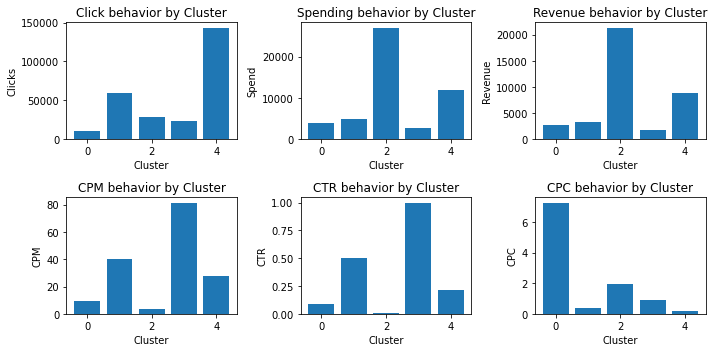

In [42]:
plt.figure(figsize=(10,5))

 
plt.subplot(2,3,1)

plt.bar(df['Clus_kmeans5'], df['Clicks'])

plt.xlabel('Cluster')

plt.ylabel('Clicks')

plt.title('Click behavior by Cluster')

 

plt.subplot(2,3,2)

plt.bar(df['Clus_kmeans5'], df['Spend'])

plt.xlabel('Cluster')

plt.ylabel('Spend')

plt.title('Spending behavior by Cluster')

 

plt.subplot(2,3,3)

plt.bar(df['Clus_kmeans5'], df['Revenue'])

plt.xlabel('Cluster')

plt.ylabel('Revenue')

plt.title('Revenue behavior by Cluster')

 

plt.subplot(2,3,4)

plt.bar(df['Clus_kmeans5'], df['CPM'])

plt.xlabel('Cluster')

plt.ylabel('CPM')

plt.title('CPM behavior by Cluster')

 

plt.subplot(2,3,5)

plt.bar(df['Clus_kmeans5'], df['CTR'])

plt.xlabel('Cluster')

plt.ylabel('CTR')

plt.title('CTR behavior by Cluster')

 

plt.subplot(2,3,6)

plt.bar(df['Clus_kmeans5'], df['CPC'])

plt.xlabel('Cluster')

plt.ylabel('CPC')

plt.title('CPC behavior by Cluster')

 

plt.tight_layout()

plt.show()